In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt


import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct
import sqlite3
from sqlite3 import Error

In [2]:
database = "/Users/claytonhribar/Documents/Citi-bike-project/static/python/sql_1.sqlite3"

engine = create_engine("sqlite:////Users/claytonhribar/Documents/Citi-bike-project/static/python/sql_1.sqlite3")

In [3]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


if __name__ == '__main__':
    create_connection(database)

2.6.0


In [4]:
conn = engine.connect()


In [5]:
Base = automap_base()

Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['rides_df', 'station_info']

In [9]:
rides = Base.classes.rides_df

stations = Base.classes.rides_df

In [10]:
session = Session(engine)

In [14]:
rides = engine.execute('SELECT * FROM rides_df')

In [15]:
rides_df = pd.DataFrame(rides)

In [16]:
rides_df.head()

,0,1,2,3,4,5,6,7
0,1,534,2020-04-01 00:00:15.280000,3656,545,Subscriber,1990,2
1,2,529,2020-04-01 00:02:28.943000,3163,3301,Subscriber,1974,1
2,3,1488,2020-04-01 00:02:56.090000,3164,3605,Subscriber,1982,1
3,4,341,2020-04-01 00:03:25.141000,3827,3869,Subscriber,1996,1
4,5,2206,2020-04-01 00:05:35.279000,3890,3058,Subscriber,1977,1


In [21]:
rides_df.columns

RangeIndex(start=0, stop=8, step=1)

In [24]:
rides_df = rides_df.rename(columns={0:'ride_no', 1:'tripduration', 2:'starttime', 3:'start_station_id', 4:'end_station_id', 5:'membership', 6:'birthyear', 7:'gender'})

In [29]:
rides_df.dtypes

ride_no              int64
tripduration         int64
starttime           object
start_station_id     int64
end_station_id       int64
membership          object
birthyear            int64
gender               int64
dtype: object

In [30]:
rides_df['starttime'] = pd.to_datetime(rides_df['starttime'])

In [31]:
rides_df.dtypes

ride_no                      int64
tripduration                 int64
starttime           datetime64[ns]
start_station_id             int64
end_station_id               int64
membership                  object
birthyear                    int64
gender                       int64
dtype: object

In [32]:
rides_df.resample('M', on='starttime').count()

,ride_no,tripduration,starttime,start_station_id,end_station_id,membership,birthyear,gender
starttime,,,,,,,,
2020-01-31,1240596,1240596,1240596,1240596,1240596,1240596,1240596,1240596
2020-02-29,1146830,1146830,1146830,1146830,1146830,1146830,1146830,1146830
2020-03-31,1068457,1068457,1068457,1068457,1068457,1068457,1068457,1068457
2020-04-30,682762,682762,682762,682762,682762,682762,682762,682762
2020-05-31,1487890,1487890,1487890,1487890,1487890,1487890,1487890,1487890
2020-06-30,1882273,1882273,1882273,1882273,1882273,1882273,1882273,1882273
2020-07-31,2105808,2105808,2105808,2105808,2105808,2105808,2105808,2105808
2020-08-31,2329514,2329514,2329514,2329514,2329514,2329514,2329514,2329514


In [33]:
rides_over_time = rides_df.resample('M', on='starttime').count()

In [36]:
rides_over_time

,ride_no,tripduration,starttime,start_station_id,end_station_id,membership,birthyear,gender
starttime,,,,,,,,
2020-01-31,1240596,1240596,1240596,1240596,1240596,1240596,1240596,1240596
2020-02-29,1146830,1146830,1146830,1146830,1146830,1146830,1146830,1146830
2020-03-31,1068457,1068457,1068457,1068457,1068457,1068457,1068457,1068457
2020-04-30,682762,682762,682762,682762,682762,682762,682762,682762
2020-05-31,1487890,1487890,1487890,1487890,1487890,1487890,1487890,1487890
2020-06-30,1882273,1882273,1882273,1882273,1882273,1882273,1882273,1882273
2020-07-31,2105808,2105808,2105808,2105808,2105808,2105808,2105808,2105808
2020-08-31,2329514,2329514,2329514,2329514,2329514,2329514,2329514,2329514


<BarContainer object of 8 artists>

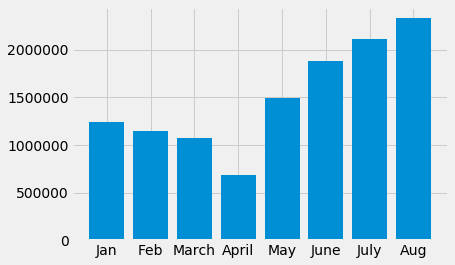

In [38]:
x_values = ['Jan','Feb','March','April','May','June','July', 'Aug']

y_values = rides_over_time['ride_no']

plt.bar(x_values, y_values)

In [39]:
avg_trip_time = rides_df.resample('M', on='starttime').mean()['tripduration']

In [40]:
avg_trip_time

starttime
2020-01-31     784.629907
2020-02-29     792.074992
2020-03-31    1160.832886
2020-04-30    1613.020301
2020-05-31    1631.915412
2020-06-30    1639.090759
2020-07-31    1587.440199
2020-08-31    1399.632232
Freq: M, Name: tripduration, dtype: float64

792.0749919342884

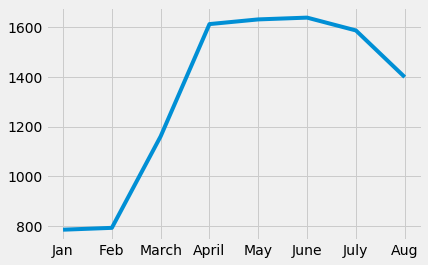

In [43]:
trip_durations = avg_trip_time
plt.plot(x_values, trip_durations)

In [49]:
rider_makeup_membership = rides_df['membership'].value_counts()

rider_makeup_sex = rides_df['gender'].value_counts()

In [134]:
rider_makeup_membership

Subscriber    9152952
Customer      2791178
Name: membership, dtype: int64

([<matplotlib.patches.Wedge at 0x27c15c790>,
 [Text(-0.7369492894184442, -0.8166429726787897, 'Subscriber'),
  Text(0.7369492511886264, 0.8166430071778752, 'Customer')],
 [Text(-0.40197233968278767, -0.44544162146115795, '76.6%'),
  Text(0.4019723188301598, 0.445441640278841, '23.4%')])

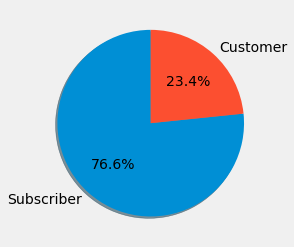

In [135]:
member_labels = ['Subscriber','Customer']
plt.pie(rider_makeup_membership, labels=member_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [50]:
rider_makeup_sex

1    7265552
2    3362977
0    1315601
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x27a723b90>,
 [Text(-1.1312182910659434, -0.4004312399874, 'male'),
  Text(1.0999813922342256, -0.0063981824336994024, 'female'),
  Text(0.3730872599873647, 1.0347975147028141, 'unknown')],
 [Text(-0.6598773364551336, -0.23358488999264998, '60.8%'),
  Text(0.5999898503095775, -0.0034899176911087648, '28.2%'),
  Text(0.2035021418112898, 0.5644350080197167, '11.0%')])

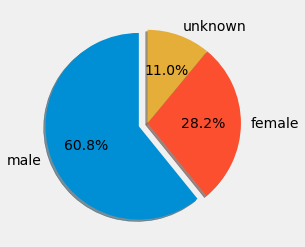

In [59]:
labels = ['male','female', 'unknown']

explode = (0.1, 0, 0)

plt.pie(rider_makeup_sex, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [66]:
male_riders = rides_df.loc[rides_df['gender']== 1]

([<matplotlib.patches.Wedge at 0x27da0c350>,
 [Text(-0.4429720669324299, -1.0068643145516734, 'Subscriber'),
  Text(0.4429720669324301, 1.0068643145516734, 'Customer')],
 [Text(-0.24162112741768899, -0.5491987170281853, '86.8%'),
  Text(0.2416211274176891, 0.5491987170281853, '13.2%')])

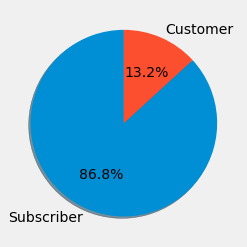

In [71]:
male_values = male_riders.membership.value_counts()

member_labels = ['Subscriber', 'Customer']

plt.pie(male_values, labels=member_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [72]:
female_riders = rides_df.loc[rides_df['gender']== 2]

([<matplotlib.patches.Wedge at 0x27cfadb50>,
 [Text(-0.6545701955306974, -0.8840462991964305, 'Subscriber'),
  Text(0.6545701955306976, 0.8840462991964304, 'Customer')],
 [Text(-0.3570382884712895, -0.48220707228896204, '79.7%'),
  Text(0.35703828847128954, 0.482207072288962, '20.3%')])

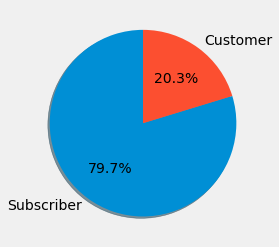

In [73]:
female_values = female_riders.membership.value_counts()

plt.pie(female_values, labels=member_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [98]:
subscribers = pd.DataFrame(rides_df.loc[rides_df['membership']=='Subscriber']).resample('M', on='starttime').count()
customers = rides_df.loc[rides_df['membership']=='Customer'].resample('M', on='starttime').count()

In [97]:
subscribers

,ride_no,tripduration,starttime,start_station_id,end_station_id,membership,birthyear,gender
starttime,,,,,,,,
2020-01-31,1145819,1145819,1145819,1145819,1145819,1145819,1145819,1145819
2020-02-29,1054927,1054927,1054927,1054927,1054927,1054927,1054927,1054927
2020-03-31,914068,914068,914068,914068,914068,914068,914068,914068
2020-04-30,516495,516495,516495,516495,516495,516495,516495,516495
2020-05-31,1012059,1012059,1012059,1012059,1012059,1012059,1012059,1012059
2020-06-30,1306688,1306688,1306688,1306688,1306688,1306688,1306688,1306688
2020-07-31,1530982,1530982,1530982,1530982,1530982,1530982,1530982,1530982
2020-08-31,1671914,1671914,1671914,1671914,1671914,1671914,1671914,1671914


In [99]:
customers

,ride_no,tripduration,starttime,start_station_id,end_station_id,membership,birthyear,gender
starttime,,,,,,,,
2020-01-31,94777,94777,94777,94777,94777,94777,94777,94777
2020-02-29,91903,91903,91903,91903,91903,91903,91903,91903
2020-03-31,154389,154389,154389,154389,154389,154389,154389,154389
2020-04-30,166267,166267,166267,166267,166267,166267,166267,166267
2020-05-31,475831,475831,475831,475831,475831,475831,475831,475831
2020-06-30,575585,575585,575585,575585,575585,575585,575585,575585
2020-07-31,574826,574826,574826,574826,574826,574826,574826,574826
2020-08-31,657600,657600,657600,657600,657600,657600,657600,657600


In [103]:
y_subs = subscribers.ride_no

y_custs = customers.ride_no

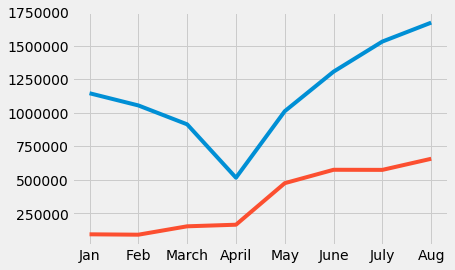

In [107]:
plt.plot(x_values, y_subs)
plt.plot(x_values, y_custs)

In [123]:
popular_stations = rides_df.groupby(['start_station_id']).count().sort_values('ride_no')

In [124]:
popular_stations

,ride_no,tripduration,starttime,end_station_id,membership,birthyear,gender
start_station_id,,,,,,,
4090,2,2,2,2,2,2,2
3912,3,3,3,3,3,3,3
4084,23,23,23,23,23,23,23
4087,26,26,26,26,26,26,26
4086,31,31,31,31,31,31,31
...,...,...,...,...,...,...,...
499,57859,57859,57859,57859,57859,57859,57859
435,58123,58123,58123,58123,58123,58123,58123
3141,58915,58915,58915,58915,58915,58915,58915


In [127]:
most_popular = engine.execute('SELECT (station_location) FROM station_info WHERE station_id = 514')

In [131]:
print(most_popular.first()[0])

12 Ave & W 40 St


In [132]:
least_popular = engine.execute('SELECT (station_location) FROM station_info WHERE station_id = 4090')

In [133]:
print(least_popular.first()[0])

Grand Concourse & E 156 St
